<a href="https://colab.research.google.com/github/bombom93/bigcontest/blob/kwonsu/saengjabga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 나눔고딕코드 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib as mpl
from scipy import stats



# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕코딩 폰트로 변경
plt.rc('font', family='NanumBarunGothic')

In [ ]:
print(plt.rcParams['font.family'])

['NanumBarunGothic']


In [ ]:
# 실적 데이터 불러오고 컬럼명,타입 설정 ***********(실적 : Performance, pf)
features = ['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group', 'unit_price', 'total_price']
dtype_list = ['datetime64', 'float64', 'int32', 'int32', 'object', 'object', 'int32', 'float64']
dtypes =  dict(zip(features, dtype_list))

pf = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx', sheet_name = 'rawdata_2019(완)', header=1, dtype=dtypes)
pf.columns=features
pf['sales'] = round(pf['total_price']/pf['unit_price'],0)

pf.shape

(38309, 9)

In [ ]:
# 방송일시 컬럼 세분화
pf["YEAR"] = pf['broadcast'].dt.year
pf["MONTH"] = pf['broadcast'].dt.month
pf["DAY"] = pf['broadcast'].dt.day
pf["HOUR"] = pf['broadcast'].dt.hour
pf["MINUTE"] = pf['broadcast'].dt.minute
pf["SECOND"] = pf['broadcast'].dt.second
pf["YEAR_DAY"] = pf['broadcast'].dt.date
pf['DAY_NAME'] = pf['broadcast'].dt.day_name()

In [ ]:
pf2 = pf.copy()

In [ ]:
month = np.array(pf2['MONTH'])
day = np.array(pf2['DAY'])
hour = np.array(pf2['HOUR'])
minute = np.array(pf2['MINUTE'])

for i in range(len(pf2)) :
  # 익일 0시부터 2시까지 데이터는 전날 데이터로 계산
  if hour[i] ==0 or hour[i] ==1 or hour[i] ==2:
    pf2['broadcast'][i] = pd.DatetimeIndex(pf2['broadcast'])[i] - timedelta(days=1)
        
pf2['MONTH'] = month
pf2['DAY'] = day
pf2['HOUR'] = hour
pf2['MINUTE'] = minute

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# 무형 데이터 제거
pf2 = pf2[pf2.p_group != '무형']
pf2.reset_index(drop=True)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,2019,1,1,6,0,0,2019-01-01,Tuesday
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,2019,1,1,6,0,0,2019-01-01,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,2019,1,1,6,20,0,2019-01-01,Tuesday
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,2019,1,1,6,20,0,2019-01-01,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,2019,1,1,6,40,0,2019-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,69.0,2019,12,31,23,40,0,2019-12-31,Tuesday
37368,2019-12-31 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.0,2020,1,1,0,0,0,2020-01-01,Wednesday
37369,2019-12-31 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.0,2020,1,1,0,0,0,2020-01-01,Wednesday
37370,2019-12-31 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,87.0,2020,1,1,0,0,0,2020-01-01,Wednesday


In [ ]:
# total_price 빈값 데이터 삭제
pf2 = pf2.dropna(subset=['total_price'])
pf2.reset_index(drop=True)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,2019,1,1,6,0,0,2019-01-01,Tuesday
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,2019,1,1,6,0,0,2019-01-01,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,2019,1,1,6,20,0,2019-01-01,Tuesday
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,2019,1,1,6,20,0,2019-01-01,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,2019,1,1,6,40,0,2019-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,69.0,2019,12,31,23,40,0,2019-12-31,Tuesday
35375,2019-12-31 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.0,2020,1,1,0,0,0,2020-01-01,Wednesday
35376,2019-12-31 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.0,2020,1,1,0,0,0,2020-01-01,Wednesday
35377,2019-12-31 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,87.0,2020,1,1,0,0,0,2020-01-01,Wednesday


In [ ]:
# 추가된 컬럼들 다시 최신화
pf2["YEAR"] = pf2['broadcast'].dt.year
pf2["MONTH"] = pf2['broadcast'].dt.month
pf2["DAY"] = pf2['broadcast'].dt.day
pf2["HOUR"] = pf2['broadcast'].dt.hour
pf2["MINUTE"] = pf2['broadcast'].dt.minute
pf2["SECOND"] = pf2['broadcast'].dt.second
pf2["YEAR_DAY"] = pf2['broadcast'].dt.date
pf2['DAY_NAME'] = pf2['broadcast'].dt.day_name()

In [ ]:
# 결측값 채우기
pf2['exp_min'] = pf2['exp_min'].fillna(method='ffill')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


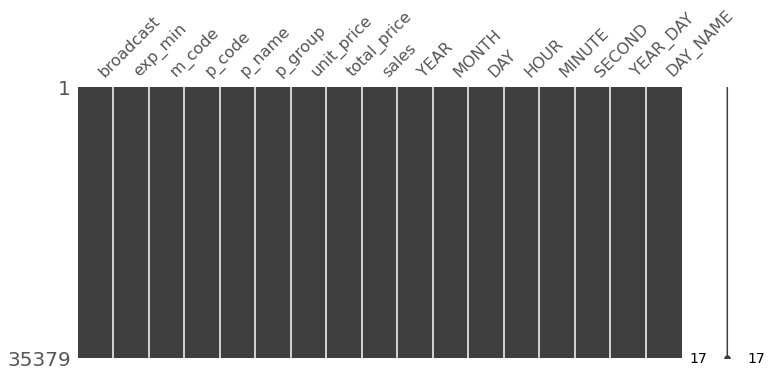

In [ ]:
# 결측값 확인
msno.matrix(pf2, figsize=(12,5))

In [ ]:
# 100개씩 보기, 지수표현 없애기
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
saeng = pf2[pf2['p_group'] == '생활용품']
jab = pf2[pf2['p_group'] == '잡화']
ga = pf2[pf2['p_group'] == '가전']

In [ ]:
saeng.describe()

,exp_min,m_code,p_code,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
count,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769,2769
mean,21,100402,201248,176604,18650049,181,2019,8,16,13,20,0
std,3,207,598,163742,17314920,239,0,3,9,8,16,0
min,3,100024,200035,12800,103000,2,2019,1,1,0,0,0
25%,20,100226,200789,69800,5888000,38,2019,5,8,7,0,0
50%,20,100372,201180,148000,12981000,95,2019,9,16,13,20,0
75%,20,100501,201519,218000,26425000,231,2019,11,23,20,40,0
max,30,100807,202373,1980000,112361000,2821,2019,12,31,23,50,0


In [ ]:
len(saeng.p_name.unique())

169

In [ ]:
print(len(saeng.p_name.unique()),len(saeng.m_code.unique()))

169 76


In [ ]:
print(len(jab.p_name.unique()),len(jab.m_code.unique()))

262 79


In [ ]:
print(len(ga.p_name.unique()),len(ga.m_code.unique()))

161 22


In [ ]:
saeng[saeng['unit_price'] == 1980000]

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
24864,2019-08-21 23:20:00,20,100567,201666,무이자 코지마 안마의자 오딧세이,생활용품,1980000,22565000,11,2019,8,21,23,20,0,2019-08-21,Wednesday
24866,2019-08-21 23:40:00,20,100567,201666,무이자 코지마 안마의자 오딧세이,생활용품,1980000,9040000,5,2019,8,21,23,40,0,2019-08-21,Wednesday
25687,2019-08-30 22:20:00,20,100146,200406,무이자 브람스안마의자 럭셔리,생활용품,1980000,9081000,5,2019,8,30,22,20,0,2019-08-30,Friday
25689,2019-08-30 22:40:00,20,100146,200406,무이자 브람스안마의자 럭셔리,생활용품,1980000,9081000,5,2019,8,30,22,40,0,2019-08-30,Friday


In [ ]:
saeng[saeng['exp_min'] > 20]

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME
526,2019-01-06 00:00:00,30,100433,201346,스위스밀리터리 전동공구세트,생활용품,138000,25755000,187,2019,1,6,0,0,0,2019-01-06,Sunday
527,2019-01-06 00:30:00,30,100433,201346,스위스밀리터리 전동공구세트,생활용품,138000,57904000,420,2019,1,6,0,30,0,2019-01-06,Sunday
5928,2019-03-02 01:00:00,30,100737,202164,무이자 김병만의 달인 공구 세트,생활용품,178000,7787000,44,2019,3,2,1,0,0,2019-03-02,Saturday
5929,2019-03-02 01:00:00,30,100737,202167,일시불 김병만의 달인 공구 세트,생활용품,173000,4197000,24,2019,3,2,1,0,0,2019-03-02,Saturday
5930,2019-03-02 01:30:00,26,100737,202164,무이자 김병만의 달인 공구 세트,생활용품,178000,9861000,55,2019,3,2,1,30,0,2019-03-02,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30735,2019-10-16 00:30:00,30,100176,200599,사운드룩 LP턴테이블 오디오 SLT-7080BT,생활용품,159000,6621000,42,2019,10,16,0,30,0,2019-10-16,Wednesday
32610,2019-11-04 23:20:00,30,100176,200600,사운드룩 올인원 LP턴테이블 오디오 SLT-5080PRO,생활용품,258000,25875000,100,2019,11,4,23,20,0,2019-11-04,Monday
32611,2019-11-04 23:20:00,30,100176,200599,사운드룩 LP턴테이블 오디오 SLT-7080BT,생활용품,159000,7711000,48,2019,11,4,23,20,0,2019-11-04,Monday
32612,2019-11-04 23:50:00,30,100176,200600,사운드룩 올인원 LP턴테이블 오디오 SLT-5080PRO,생활용품,258000,65066000,252,2019,11,4,23,50,0,2019-11-04,Monday


In [ ]:
smon = saeng.groupby('MONTH').sum()
jmon = jab.groupby('MONTH').sum()
gmon = ga.groupby('MONTH').sum()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


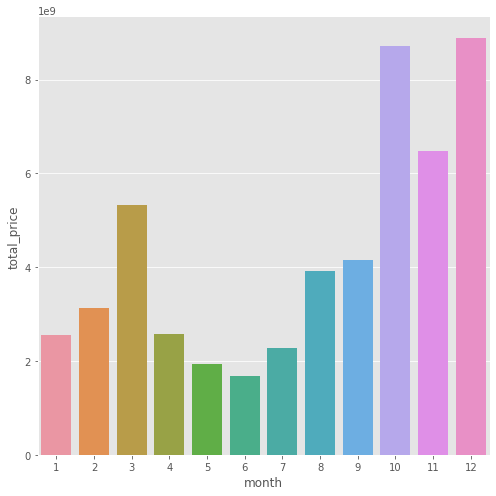

In [ ]:
smon_index = smon.index
smon['month'] = smon_index
smon.reset_index(drop=True)

sns.catplot(x='month', y='total_price',data=smon,kind='bar',height=7)

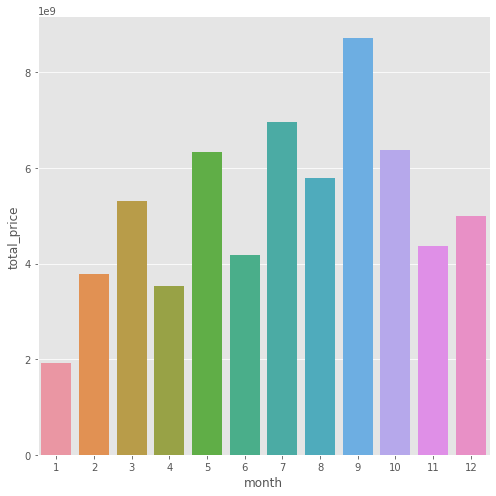

In [ ]:
jmon_index = jmon.index
jmon['month'] = jmon_index
jmon.reset_index(drop=True)

sns.catplot(x='month', y='total_price',data=jmon,kind='bar',height=7)

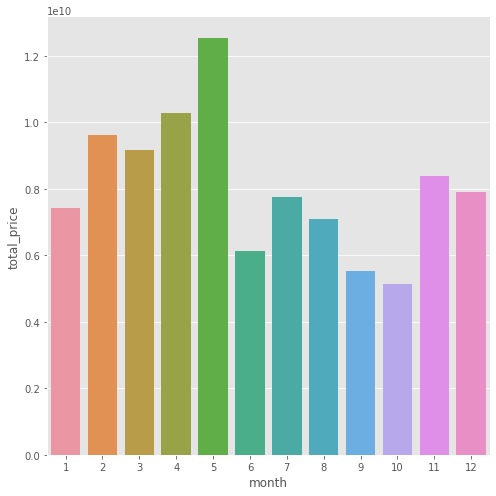

In [ ]:
gmon_index = jmon.index
gmon['month'] = jmon_index
gmon.reset_index(drop=True)

sns.catplot(x='month', y='total_price',data=gmon ,kind='bar',height=7)

In [ ]:
wwww = pf2[pf2['p_group'].isin(['생활용품','잡화','가전'])]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0,

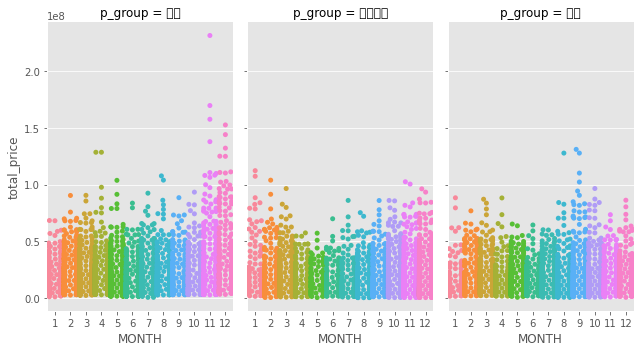

In [ ]:
sns.catplot(x="MONTH", y="total_price",
            col="p_group", aspect=.6,
            kind="swarm", data=wwww)

In [ ]:
shour = saeng.groupby('HOUR').sum()
jhour = jab.groupby('HOUR').sum()
ghour = ga.groupby('HOUR').sum()

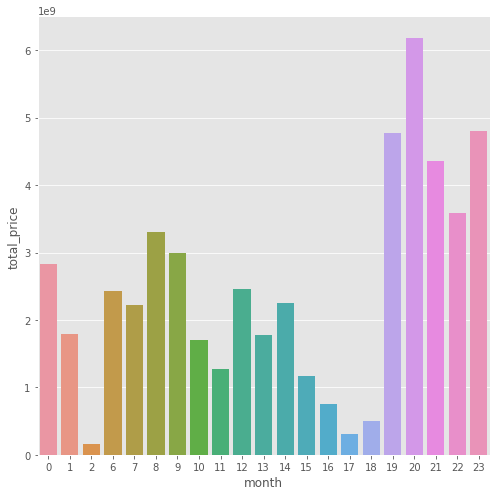

In [ ]:
shour_index = shour.index
shour['month'] = shour_index
shour.reset_index(drop=True)

sns.catplot(x='month', y='total_price',data=shour,kind='bar',height=7)

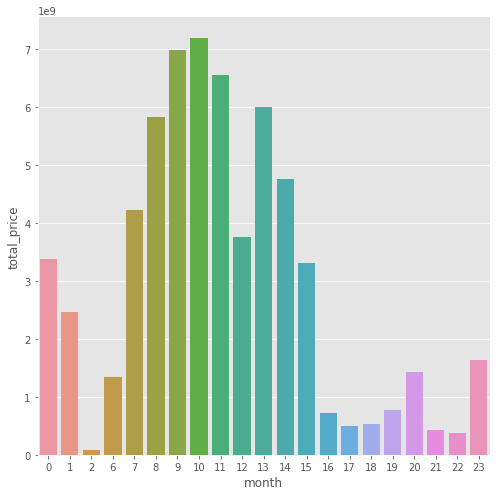

In [ ]:
jhour_index = jhour.index
jhour['month'] = jhour_index
jhour.reset_index(drop=True)

sns.catplot(x='month', y='total_price',data=jhour,kind='bar',height=7)

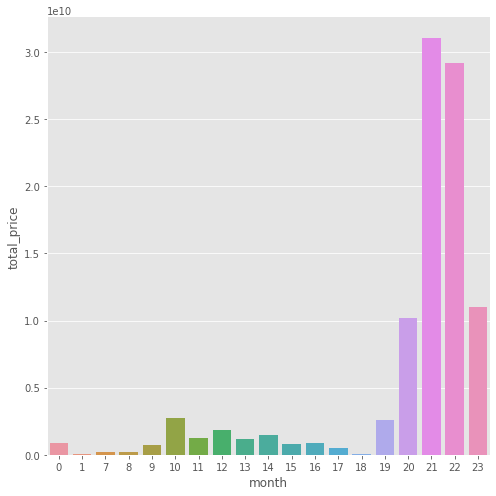

In [ ]:
ghour_index = ghour.index
ghour['month'] = ghour_index
ghour.reset_index(drop=True)

sns.catplot(x='month', y='total_price',data=ghour,kind='bar',height=7)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0,

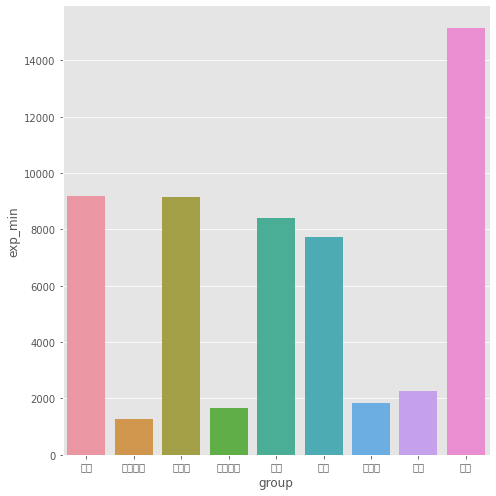

In [ ]:
jan = pf2[pf2['MONTH']==1]
jan2 = jan.groupby('p_group').sum()

jan2_index = jan2.index
jan2['group'] = jan2_index
jan2.reset_index(drop=True)

sns.catplot(x='group', y='exp_min',data=jan2,kind='bar',height=7)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0,

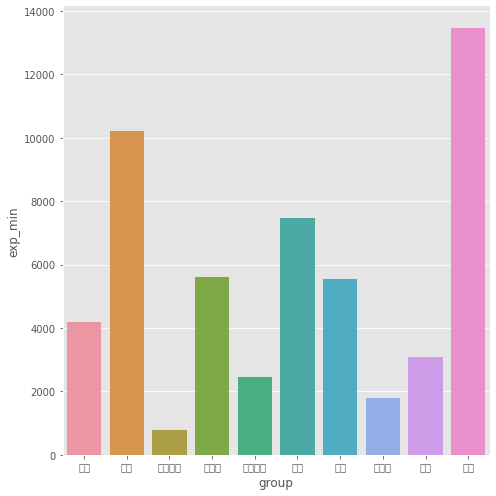

In [ ]:
feb = pf2[pf2['MONTH']==2]
feb2 = feb.groupby('p_group').sum()

feb2_index = feb2.index
feb2['group'] = feb2_index
feb2.reset_index(drop=True)

sns.catplot(x='group', y='exp_min',data=feb2,kind='bar',height=7)

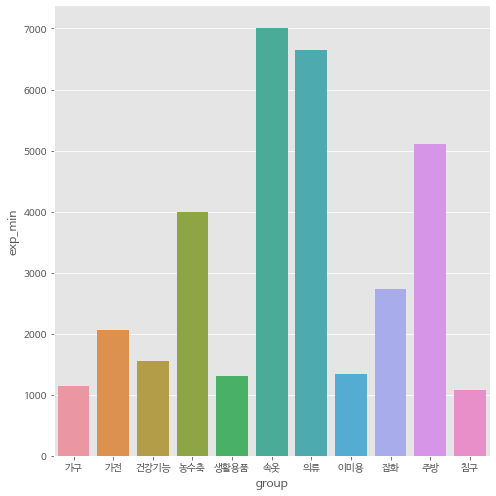

In [ ]:
jun = pf2[pf2['MONTH']==6]
jun2 = jun.groupby('p_group').sum()

jun2_index = jun2.index
jun2['group'] = jun2_index
jun2.reset_index(drop=True)

sns.catplot(x='group', y='exp_min',data=jun2,kind='bar',height=7)